### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# drop the car column as it is not interesting because of lack of data
clean_data = data.drop('car', axis=1)

# check the columns which have missing data
isna = [column for column in clean_data.columns if clean_data[column].isna().sum() != 0]
print(clean_data[isna].isna().sum())

# find the number or rows/% of rows that have missing data
temp = clean_data.dropna()
print(f'number of rows dropped = {clean_data.shape[0] - temp.shape[0]}')
print(f'% rows dropped = {(clean_data.shape[0] - temp.shape[0])*100/clean_data.shape[0]}')

# given total number of rows with null data is ~4.8% it should be ok to drop these rows. 
# Also it is not clear how we can guess these missing values from other data, it is simpler
# strategy to drop these rows
clean_data = temp

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64
number of rows dropped = 605
% rows dropped = 4.769788710186061


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# since Y has only values 0 or 1 and all rows have this value sum of Y column will give the 
#number of accepts and count of the rows will be the total number of rows
proportion_accept = clean_data['Y'].sum()/clean_data['Y'].count()
print(proportion_accept)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

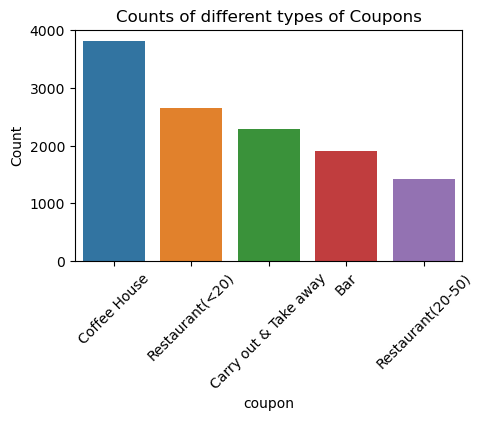

In [7]:
# it is useful to visusalize the number of coupons of each type
value_counts = clean_data['coupon'].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, legend=False)
plt.title("Counts of different types of Coupons")
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


6. Use a histogram to visualize the temperature column.

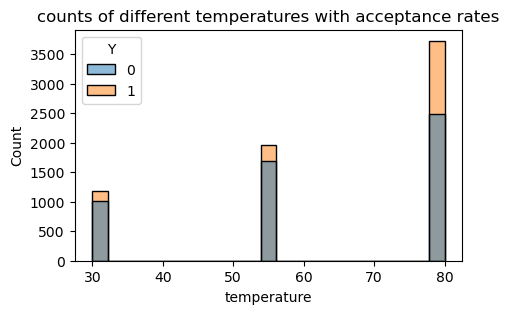

In [8]:
plt.figure(figsize=(5,3))
sns.histplot(clean_data, x='temperature', hue='Y')
plt.title('counts of different temperatures with acceptance rates')
plt.show()


In [9]:
# find the ratios of acceptance based on different temperatures
temp_ratios = [clean_data[clean_data['temperature'] == temp]['Y'].sum()
               / clean_data[clean_data['temperature'] == temp]['Y'].count() 
               for temp in [30, 55, 80]]
print(temp_ratios)


[np.float64(0.537129840546697), np.float64(0.5371381758601856), np.float64(0.5996464159434266)]


In [10]:
# the ratios indicate acceptance rate for 80 degree is almost 60% which is 
# higher than acceptance rates at lower temperatures

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
bar_df = clean_data.loc[clean_data['coupon'] == "Bar"]
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [12]:
print(bar_df['Y'].sum()/bar_df['Y'].count())


0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# following values capture 3 or less - which includes people who never went to bar
three_or_fewer = [ 'never', 'less1', '1~3']

# calculate the acceptance rate of 3
three_or_fewer_s = bar_df[bar_df['Bar'].isin(three_or_fewer)]['Y']
three_or_fewer_rate = three_or_fewer_s.sum()/three_or_fewer_s.count()

# calculate the acceptance rate of 4 or more
four_or_more_s = bar_df[~bar_df['Bar'].isin(three_or_fewer)]['Y']
four_or_more_rate = four_or_more_s.sum()/four_or_more_s.count()


In [14]:
print(f'acceptance rate who went to bar 4 or more times: {four_or_more_rate}')
print(f'acceptance rate of those who went to bar 3 or fewer times: {three_or_fewer_rate}')


acceptance rate who went to bar 4 or more times: 0.7616580310880829
acceptance rate of those who went to bar 3 or fewer times: 0.37267441860465117


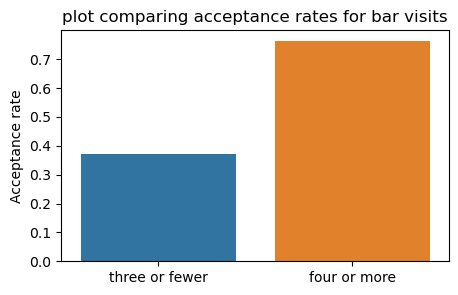

In [15]:
# bar plot the ratios to visualize
plt.figure(figsize=(5,3))
labels = ['three or fewer', 'four or more']
sns.barplot(x=labels, 
            y=[three_or_fewer_rate, four_or_more_rate],
           hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('plot comparing acceptance rates for bar visits')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [16]:
# capture the possible values for age
over_age_25 = ['26', '31', '36', '41', '46', '50plus']

# more than one visit to the bar per month
more_than_once = ['1~3', '4~8', 'gt8']

# calculate acceptance rate over age 25  and more than once a month, note assumption is that 1~3 value captures
# more than once a month
over_25_and_more_than_once = bar_df[(bar_df['age'].isin(over_age_25)) & (bar_df['Bar'].isin(more_than_once))]['Y']
acceptance_over_25 = over_25_and_more_than_once.sum()/over_25_and_more_than_once.count()

# calculate acceptance rate of all others - which is all people who are under age 25 or go to the bar less than once
all_others = bar_df[(~bar_df['age'].isin(over_age_25)) | (~bar_df['Bar'].isin(more_than_once))]['Y']
acceptance_all_others = all_others.sum()/all_others.count()



In [17]:
print(acceptance_over_25)
print(acceptance_all_others)

0.6898263027295285
0.33774834437086093


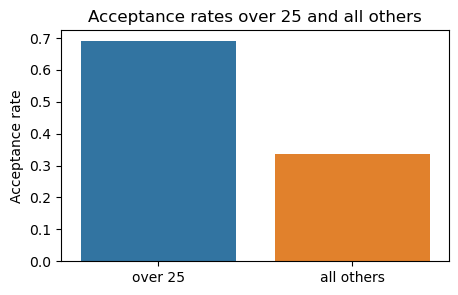

In [18]:
# barplot to visualize the ratios
plt.figure(figsize=(5,3))
labels = ['over 25', 'all others']
sns.barplot(x=labels, y=[acceptance_over_25, acceptance_all_others], hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates over 25 and all others')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [19]:
# capture values for more than once and less than once
more_than_once = ['1~3', '4~8', 'gt8']

# calculate drivers who go to bar more than once, had no passengers who were kids and does not have occupation
# (The assumption is that the value kids includes combinations where kids are with friends etc.) and occupation is not
# Farming Fishing & Forestry

drivers_s = bar_df[(bar_df['passanger'] != 'Kid(s)') 
                     & (bar_df['occupation'] != 'Farming Fishing & Forestry') 
                     & (bar_df['Bar'].isin(more_than_once))]['Y']
ratio = drivers_s.sum()/drivers_s.count()
print(ratio)

#calculate acceptance ratio of all others: passanger had a kid or occupation was Farming or visited bar less than once
all_others_s = bar_df[(bar_df['passanger'] == 'Kid(s)') 
                        | (bar_df['occupation'] == 'Farming Fishing & Forestry') 
                        | (~bar_df['Bar'].isin(more_than_once))]['Y']
all_others_ratio = all_others_s.sum()/all_others_s.count()
print(all_others_ratio)


0.7094339622641509
0.29790310918293567


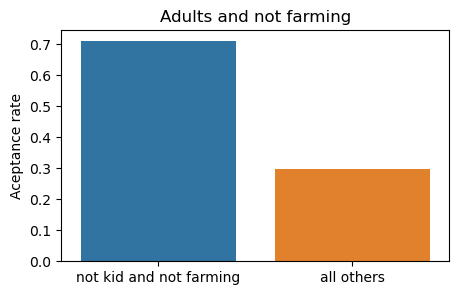

In [20]:
# visualize the ratios using a barplot. It looks like the acceptance rate on the first group
# is higher than all others though not by much (0.625 agaonst 0.546)
plt.figure(figsize=(5,3))
labels = ['not kid and not farming', 'all others']
sns.barplot(x=labels, y=[ratio, all_others_ratio], hue=labels, legend=False)
plt.ylabel('Aceptance rate')
plt.title('Adults and not farming')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



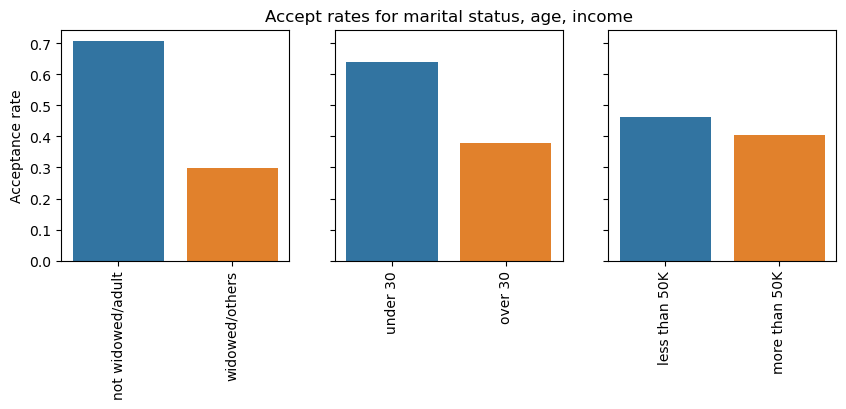

In [21]:
# calculate acceptance rate for users who go to bars more than once a month, passengers not a kid and not widowed

not_widowed = bar_df[(bar_df['Bar'].isin(more_than_once)) 
                   & (bar_df['passanger'] != 'Kid(s)') 
                   & (bar_df['maritalStatus'] != 'Widowed')]['Y']

widowed_all_others = bar_df[(~bar_df['Bar'].isin(more_than_once)) 
                              | (bar_df['passanger'] == 'Kid(s)') 
                              | (bar_df['maritalStatus'] == 'Widowed')]['Y']

not_widowed_ratio = not_widowed.sum()/not_widowed.count()
widowed_all = widowed_all_others.sum()/widowed_all_others.count()

# go to bars more than once a month and are under the age of 30

over_age_30 = ['31', '36', '41', '46', '50plus']

under_age_30 = bar_df[(bar_df['Bar'].isin(more_than_once)) 
                        & (bar_df['age'].isin(over_age_30))]['Y']

all_others_30 = bar_df[(~bar_df['Bar'].isin(more_than_once)) 
                         | (~bar_df['age'].isin(over_age_30))]['Y']

ratio_under_30 = under_age_30.sum()/under_age_30.count()
all_under_30 = all_others_30.sum()/all_others_30.count()

# calculate acceptance rates for users who go to cheap restaurants more than 4 times a month and income is less than 50K.

income_less_50K = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

more_than_4 = ['4~8', 'gt8']

cheap_res = bar_df[(bar_df['RestaurantLessThan20'].isin(more_than_4)) 
                 & (bar_df['income'].isin(income_less_50K))]['Y']

all_others_res = bar_df[(~bar_df['RestaurantLessThan20'].isin(more_than_4)) 
                          | (~bar_df['income'].isin(income_less_50K))]['Y']

cheap_res_ratio = cheap_res.sum()/cheap_res.count()
all_others_ratio = all_others_res.sum()/all_others_res.count()

# visualize using a bar plot to compare

figure, axes = plt.subplots(1, 3, figsize=(10,3), sharey=True)
axes[1].set_title('Accept rates for marital status, age, income')

labels = ['not widowed/adult', 'widowed/others']
sns.barplot(x=labels, y=[not_widowed_ratio, widowed_all], ax=axes[0], hue=labels, legend=False)
axes[0].set_xticks(labels, labels, rotation='vertical')
axes[0].set_ylabel('Acceptance rate')

labels = ['under 30', 'over 30']
sns.barplot(x=labels, y=[ratio_under_30, all_under_30], ax=axes[1], hue=labels, legend=False)
axes[1].set_xticks(labels, labels, rotation='vertical')

labels = ['less than 50K', 'more than 50K']
sns.barplot(x=labels, y=[cheap_res_ratio, all_others_ratio], ax=axes[2], hue=labels, legend=False)
axes[2].set_xticks(labels, labels, rotation='vertical')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# **Bar coupons acceptance rates**

## **Context**

This analysis focuses only on the Bar coupons. It tries to identify categories of drivers and other attributes that have an impact on the acceptance rates of the Bar coupons. For context, the number of Bar coupons is 1913 out of a total of 12079 coupons in total

The data was cleaned by dropping the car column as there wasn't significant data available. Also towards cleaning the data, we dropped the rows that had null values. This resulted in 4.7% of the rows being dropped. The assumption is that this is acceptable given there are 12079 remaining rows that should be enough to provide useful insights

## **Findings**

- Overall across all types of coupons, ~57% of the coupons were accepted
- Acceptance rates were slightly higher when the tempearture was greater than 80 degrees. One reason for this could be people went to bars more when the weather was good and sunny. The difference is not huge but noticeable (~60% against ~53%)
- Acceptance rate was almost double among those who went to bar 4 or more times than those who went to bar 3 or fewer times (76% vs 37%)

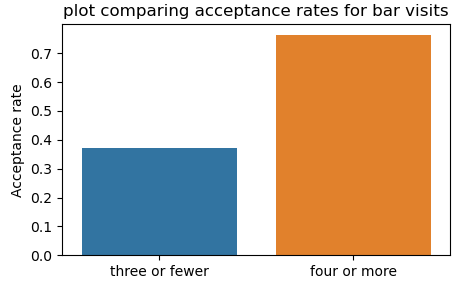

-  Acceptance rates among those who went to bar at least once and who were 25 years or older was significantly higher than others (almost double - 69% vs 34%)

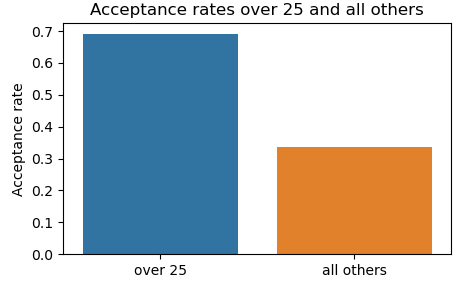

-  Acceptance rates for those who went to bar at least once, the passengers who were adults (not kids) and whose occupation was not 'Farming, Fishing or Forestry' was signficantly higher than all others (more than double 70% vs 30%)

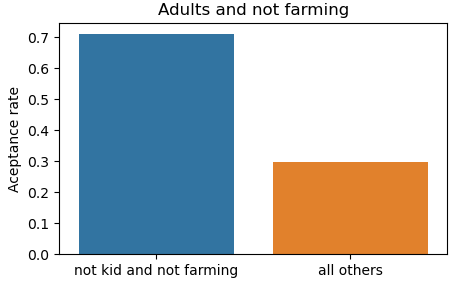

- Those who went to bar at least once a month, analysis of their age, marital status and income indicates that
   1. Rate of acceptance is much higher for those who are adults (not kids) and who are not widowed
   2. Rate of acceptance is much higher for those under 30 than all others
   3. There is not much of a difference based on income - acceptance rate was slightly higher for those who earned less than 50K
      
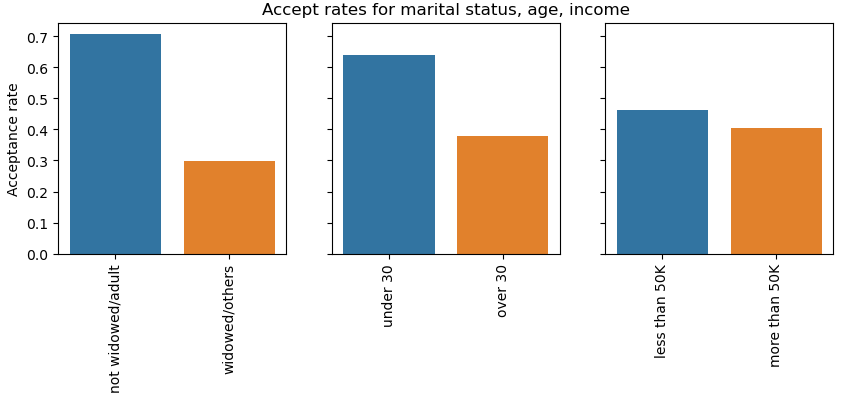

## **Conclusion**

Given the above findings, there is a greater likelihood that people in following cohorts will have higher acceptance rate:

- who went to bar at least 4 or more times a month
- who go to bar at least once a month and are 25 years of age or older
- who go to bar at least once a month and are adults and not working in 'Farming, Fishing or Forestry'
- who go to bar at least once a month and are not widowed and are over 30 years of age

Conversely, there is opportunity in focusing on the following cohorts to increase their accept rates:

- those who go to bars less than 3 times a month
- younger population especially people in the age group 20-30


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### **Coffee House coupons**

In [22]:
coffee_df = clean_data[clean_data['coupon'] == 'Coffee House']
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  Bar                   3816 non-null   object
 15  CoffeeHouse           3816 non-null   obj

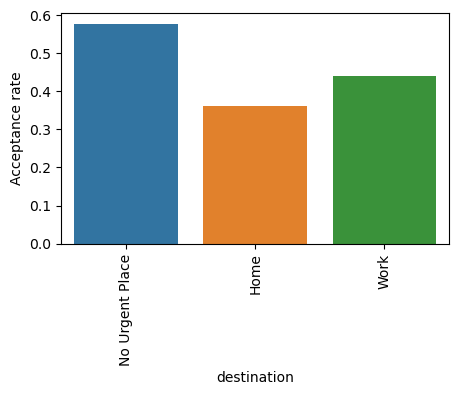

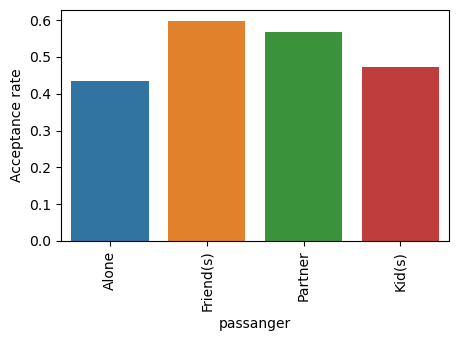

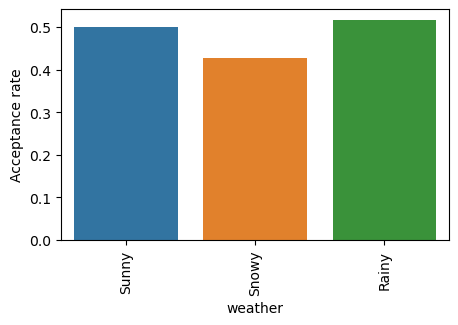

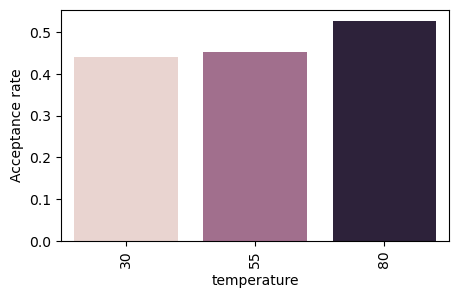

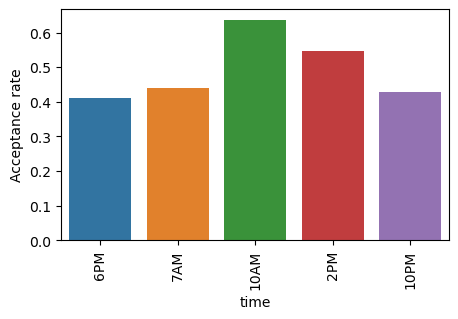

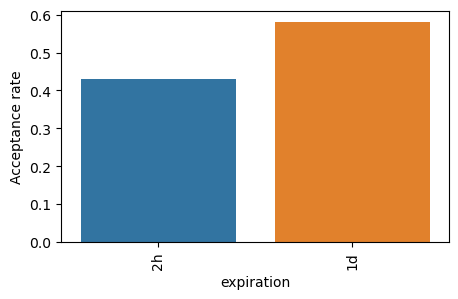

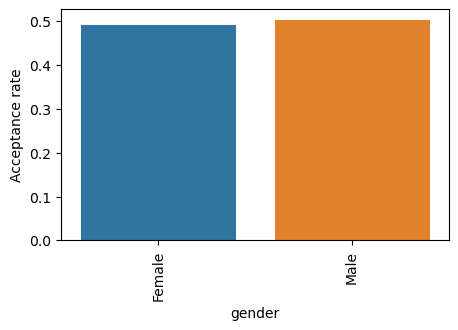

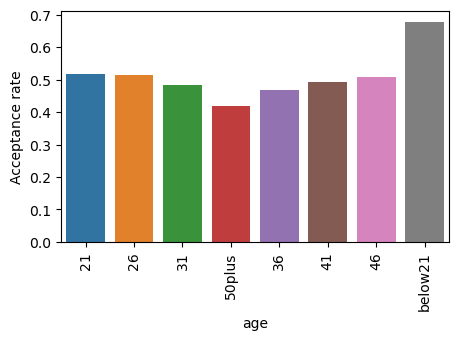

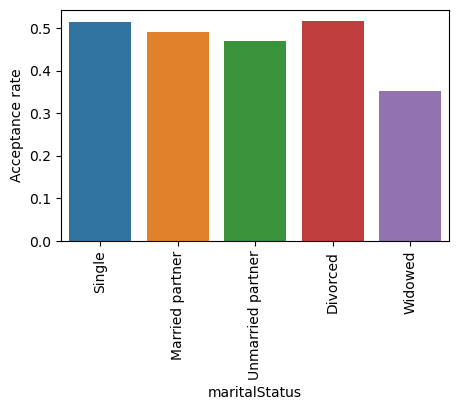

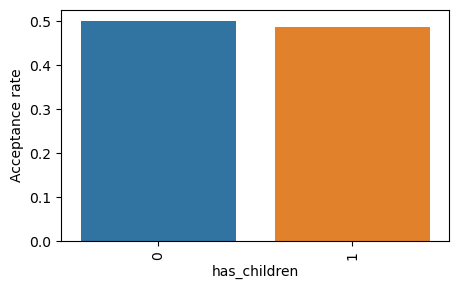

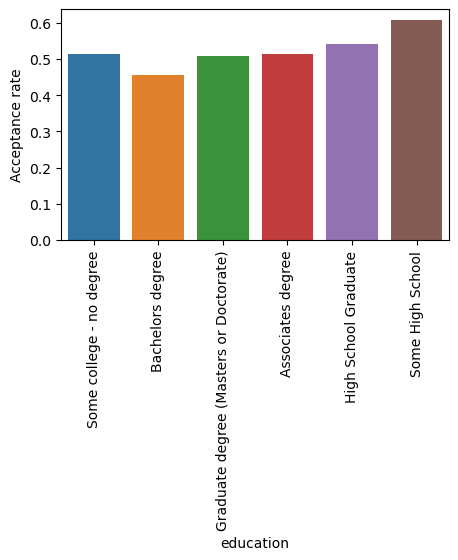

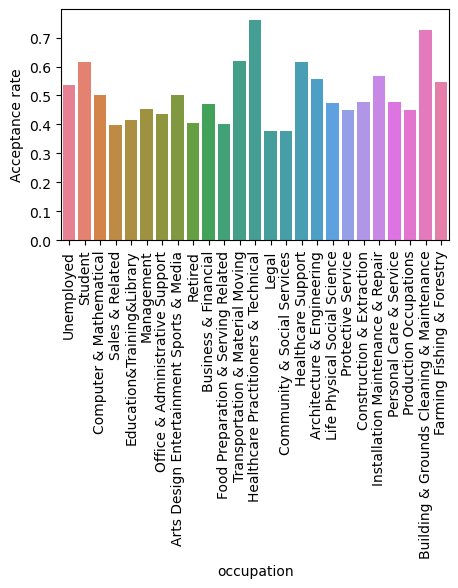

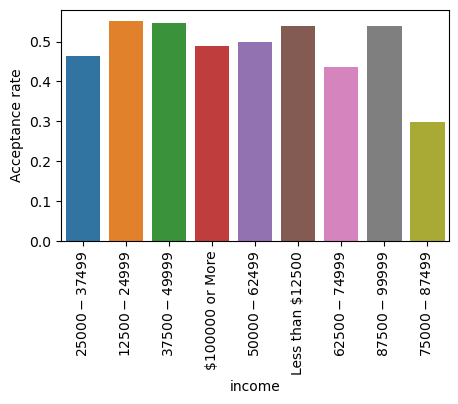

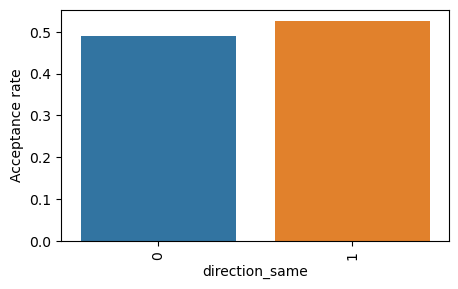

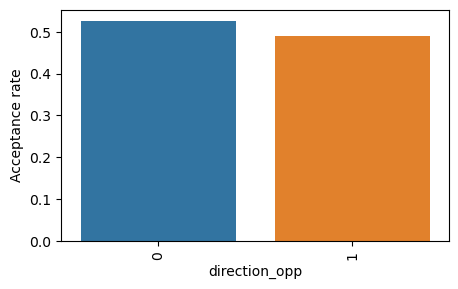

In [23]:
# ** this code is for initial exploration to see which attributes had impact on accept rate **
# iterate over some columns and check their accept rate individually in the CoffeeHouse
# coupon group

columns = ['destination', 'passanger', 'weather', 'temperature', 'time',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'direction_same',
       'direction_opp']


for column in columns:
    plt.figure(figsize=(5,3))
    plt.ylabel('Acceptance rate')
    index = coffee_df[column].value_counts().index
    accept = [coffee_df[coffee_df[column] == x]['Y'].sum()/coffee_df[coffee_df[column] == x]['Y'].count() for x in index]
    sns.barplot(x=index, y=accept, hue=index, legend=False)
    plt.xticks(rotation=90)
    plt.show()


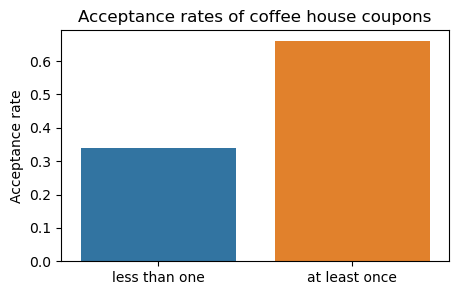

In [24]:
# compare acceptance rates of those who go to coffee house fewer than 3 times to those
# going there 4 or more times
less_than_one = ['never', 'less1']
more_than_one = ['1~3', '4~8', 'gt8']

accept_1_or_fewer = coffee_df[coffee_df['CoffeeHouse'].isin(less_than_one)]['Y']
accept_more_than_1 = coffee_df[~coffee_df['CoffeeHouse'].isin(less_than_one)]['Y']

plt.figure(figsize=(5,3))
labels = ['less than one', 'at least once']
sns.barplot(x = labels,
            y=[accept_1_or_fewer.sum()/accept_1_or_fewer.count(),
               accept_more_than_1.sum()/accept_more_than_1.count()],
           hue = labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates of coffee house coupons')
plt.show()

In [25]:
print(f'{'accept rate for 1 or fewer:':<30}{accept_1_or_fewer.sum()/accept_1_or_fewer.count()}')
print(f'{'accept rate for more than 1:':<30}{accept_more_than_1.sum()/accept_more_than_1.count()}')

accept rate for 1 or fewer:   0.34034907597535935
accept rate for more than 1:  0.6589935760171306


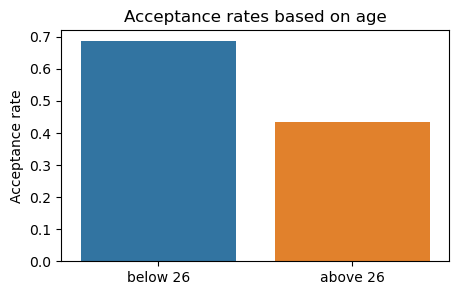

In [26]:
# compare the accept rates of people age 26 and above who go to coffee house
# at least once to all others


below_26 = ['below21', '21', '26']

accept_below_26 = coffee_df[(coffee_df['age'].isin(below_26)) & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']
accept_all_others = coffee_df[(~coffee_df['age'].isin(below_26)) | (~coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

#visualize the results

labels = ['below 26', 'above 26']
plt.figure(figsize=(5,3))
sns.barplot(x=labels, 
            y=[accept_below_26.sum()/accept_below_26.count(), 
               accept_all_others.sum()/accept_all_others.count()],
           hue = labels, legend = False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates based on age')
plt.show()

In [27]:
print(f'{'accept rates for age below 26:':<35}{accept_below_26.sum()/accept_below_26.count()}')
print(f'{'accept rates for all others:':<35}{accept_all_others.sum()/accept_all_others.count()}')

accept rates for age below 26:     0.686046511627907
accept rates for all others:       0.4337979094076655


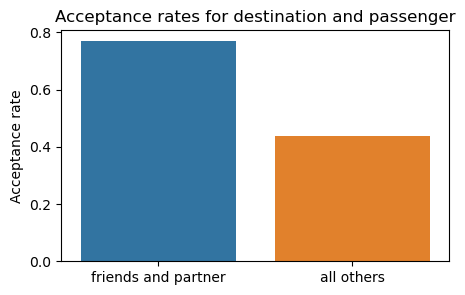

In [28]:
# compare accept ratios of those who go to coffee house at least once, don't have an urgent place to go to and are with partners or friends with all others

accept_friend_partner = coffee_df[(coffee_df['destination'] == 'No Urgent Place') 
                                & (coffee_df['passanger'].isin(['Friend(s)', 'Partner']))
                                & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

accept_all_others = coffee_df[(coffee_df['destination'] != 'No Urgent Place') 
                                | (~coffee_df['passanger'].isin(['Friend(s)', 'Partner']))
                                | (~coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']


# visualize the results

plt.figure(figsize=(5,3))
labels = ['friends and partner', 'all others']
sns.barplot(x=labels, 
            y=[accept_friend_partner.sum()/accept_friend_partner.count(), 
               accept_all_others.sum()/accept_all_others.count()],
           hue=labels, legend=False)

plt.ylabel('Acceptance rate')
plt.title('Acceptance rates for destination and passenger')
plt.show()

In [29]:
print(f'{'accept rate for friends/partners:':<35}{accept_friend_partner.sum()/accept_friend_partner.count()}')
print(f'{'accept rate for all others:':<35}{accept_all_others.sum()/accept_all_others.count()}')

accept rate for friends/partners:  0.7690058479532164
accept rate for all others:        0.4367816091954023


In [30]:
# 0 widows go to coffee house more than once

print(coffee_df[(coffee_df['maritalStatus'] == 'Widowed')
   & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y'].sum())


0


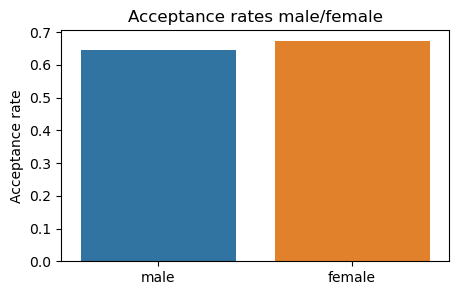

accept rate for male:              0.6443181818181818
accept rate for female:            0.6720647773279352


In [31]:
# is there a difference in accept rates based on gender

accept_rate_male = coffee_df[(coffee_df['gender'] == 'Male') 
                           & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

accept_rate_female = coffee_df[(coffee_df['gender'] == 'Female') 
                             & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

# visualize the results

plt.figure(figsize=(5,3))
labels = ['male', 'female']
sns.barplot(x=labels, 
            y=[accept_rate_male.sum()/accept_rate_male.count(), 
               accept_rate_female.sum()/accept_rate_female.count()],
           hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates male/female')
plt.show()

print(f'{'accept rate for male:':<35}{accept_rate_male.sum()/accept_rate_male.count()}')
print(f'{'accept rate for female:':<35}{accept_rate_female.sum()/accept_rate_female.count()}')

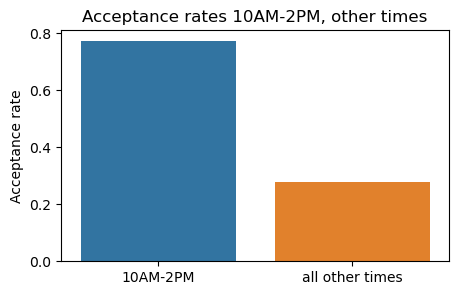

In [32]:
# check the accept rates for those who go to coffee house at least one and time between 10AM and 2PM and all others

accept_10AM = coffee_df[(coffee_df['time'].isin(['10AM', '2PM'])) 
                      & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

accept_all_others = coffee_df[(~coffee_df['time'].isin(['10AM', '2PM'])) 
                            & (~coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

# visualize the results

plt.figure(figsize=(5,3))
labels = ['10AM-2PM', 'all other times']
sns.barplot(x=labels, 
            y=[accept_10AM.sum()/accept_10AM.count(), 
               accept_all_others.sum()/accept_all_others.count()],
           hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates 10AM-2PM, other times')
plt.show()


In [33]:
print(f'{'Acceptance rate for 10AM-2PM:':<35}{accept_10AM.sum()/accept_10AM.count()}')
print(f'{'Acceptance rate for others:':<35}{accept_all_others.sum()/accept_all_others.count()}')

Acceptance rate for 10AM-2PM:      0.7719745222929937
Acceptance rate for others:        0.2784243509400179


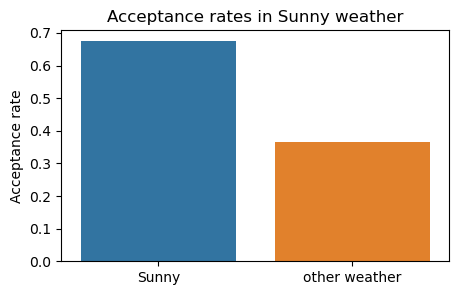

In [34]:
# compare the acceptance rate for those who go to the coffee house at least once and the weather is Sunny 
accept_snowy = coffee_df[(coffee_df['weather'] == 'Sunny') 
                       & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

all_others = coffee_df[(coffee_df['weather'] != 'Sunny') 
                     | (~coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

# visualize the results

plt.figure(figsize=(5,3))
labels = ['Sunny', 'other weather']
sns.barplot(x=labels, 
            y=[accept_snowy.sum()/accept_snowy.count(), 
               all_others.sum()/all_others.count()],
           hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates in Sunny weather')
plt.show()

In [35]:
print(f'{'accept rate in Sunny weather:':<35}{accept_snowy.sum()/accept_snowy.count()}')
print(f'{'accept rate in other weather:':<35}{all_others.sum()/all_others.count()}')

accept rate in Sunny weather:      0.6742470805162877
accept rate in other weather:      0.36409319323892186


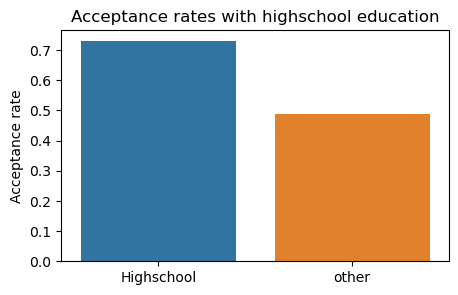

In [36]:
# explore education data
education = ['High School Graduate', 'Some High School']

accept_highschool = coffee_df[(coffee_df['education'].isin(education)) 
                       & (coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

all_others = coffee_df[(~coffee_df['education'].isin(education)) 
                     | (~coffee_df['CoffeeHouse'].isin(more_than_one))]['Y']

plt.figure(figsize=(5,3))
labels = ['Highschool', 'other']
sns.barplot(x=labels, 
            y=[accept_highschool.sum()/accept_highschool.count(), 
               all_others.sum()/all_others.count()],
           hue=labels, legend=False)
plt.ylabel('Acceptance rate')
plt.title('Acceptance rates with highschool education')
plt.show()


In [37]:
print(f'{'accept rate for highshool graduates:':<40}{accept_highschool.sum()/accept_highschool.count()}')
print(f'{'accept rate for others:':<40}{all_others.sum()/all_others.count()}')

accept rate for highshool graduates:    0.7293233082706767
accept rate for others:                 0.48791745859353786


# Coffee House coupons acceptance rates

## Context

This analysis focuses only on the _Coffee_ _House_ coupons. It tries to identify categories of drivers and other attributes that have an impact on the acceptance rates of the Coffee House coupons. For context, the number of Coffee House coupons is 3816 out of a total of 12079 coupons in total which is the highest amongst all types of coupons

The data was cleaned by dropping the car column as there wasn't significant data available. Also towards cleaning the data, we dropped the rows that had null values. This resulted in 4.7% of the rows being dropped. The assumption is that this is acceptable given there are 12079 remaining rows that should be enough to provide useful insights

## Findings

- Overall across all types of coupons, ~57% of the coupons were accepted
- Acceptance rate was much higher for those who went to Coffee House at least once than those who went there less than once a month (almost double, 66% vs 34%)

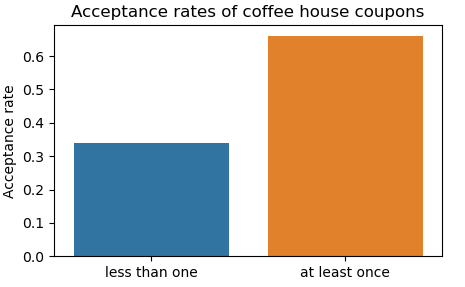

- Acceptance rate was significantly higher for those who went to the Coffee House at least once a month and were of age 26 or below (68% vs 43%)

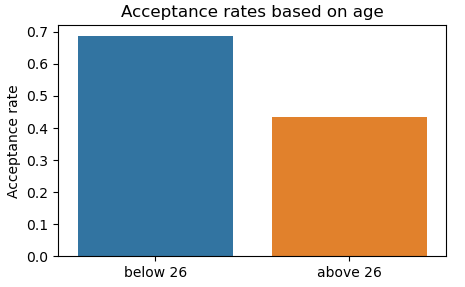

- Acceptance rate was significantly higher for passengers who went to Coffee House at least once a month, had no urgent destination and were with friends or partners (77% vs 44%)

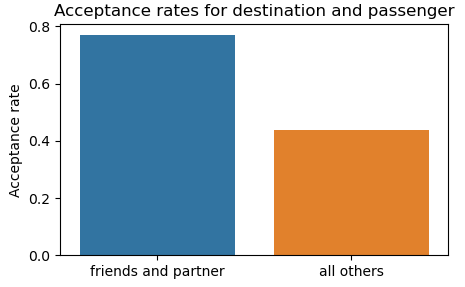

- Acceptance rates based on gender (male/female) was not much different (64% vs 67%)

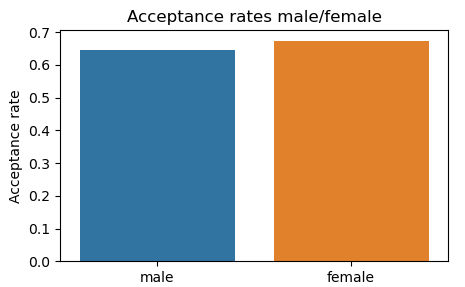

- Acceptance rates were much higher between 10AM and 2PM for those who went to Coffee House at least once (77% vs 28% which is almost 2.5 times)

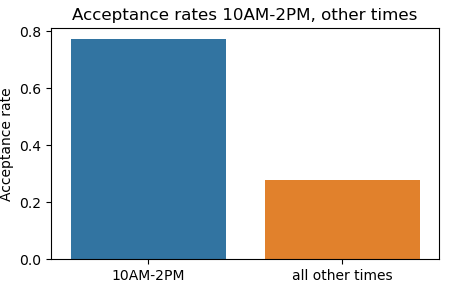

- Acceptance rates were higher when whether was Sunny for those who went to the Coffee House at least once (67% vs 49%)

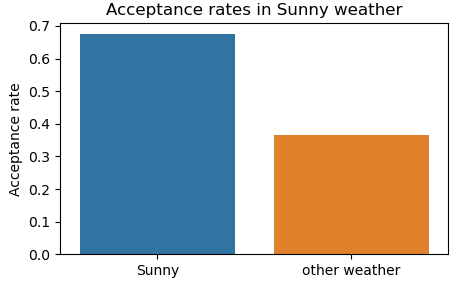

- Acceptance rates higher for those who went to the Coffee House at least once with High School diplomas then all others including graduate degrees (72% vs 48%)

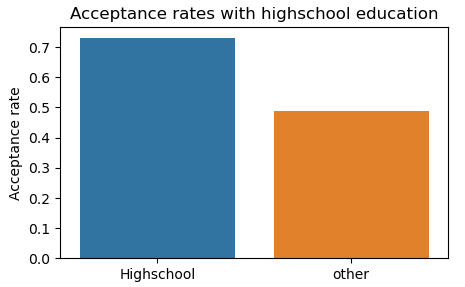

## Conclusion

Given above findings, there is a higher likelihood of Coffee House coupon being accepted by the following cohorts

- who  go to Coffee House at least once
- who are below 26 years of age
- who are with friends and have no urgent destination
- between 10AM and 2PM
- during Sunny weather and
- who have a high school diploma

Conversely, there is opportunity to increase acceptance rates for the following cohorts

- who are above 26 years of age
- who are not with friends or partners and are going to a fixed destination
- outside of 10AM and 2PM
- rainy weather and people with higher than high school diplomas

## Future work

- look also at different coupon types and see which coupons are more likely to be accepted
- the above analysis seems one dimensional - there is opportunity to look at different combinations of cohorts and see if there is some aspect that distinguishes in some way (w.r.t accept rate which could be very high or very low)
- there is an oppotunity to convert the columns to numeric and run pairplots to analyze relationships between different features of the data set